In [100]:
def group_category(x, category_group):
    if category_group.upper() in x.upper():
        category = category_group
    else:
        category = x
    return category

In [101]:
# group Venue Categories
city_venues.dropna(inplace = True)
city_venues['grouped Venue Category'] = city_venues['Venue Category']
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Restaurant'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Store'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'House'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Museum'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Airport'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Joint'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Boutique'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Art'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Shop'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Bar'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Stadium'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Field'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Place'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Court'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Cafe'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Market'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Service'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Studio'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Gym'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Park'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Club'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Center'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Garden'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Salon'))
city_venues['grouped Venue Category'] = city_venues['grouped Venue Category'].apply(lambda x: group_category(x, 'Rink'))






city_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,grouped Venue Category
3,ALGIERS (EL DJAZAIR),35.211183,4.183990,Pizzeria Printania,35.211276,4.182763,Pizza Place,Place
4,ALGIERS (EL DJAZAIR),35.211183,4.183990,Hotel Kerdada Bou Saada,35.211229,4.184034,Hotel,Hotel
5,ALGIERS (EL DJAZAIR),35.211183,4.183990,Marché de Bou-Saada,35.212458,4.180231,Market,Market
6,Annaba,36.898216,7.754927,"Place de la révolution ""EL Cour """,36.897399,7.760449,Historic Site,Historic Site
7,Annaba,36.898216,7.754927,bazaar,36.899019,7.757154,Market,Market


In [102]:
# create a dictionary grouping some of the rest of the categories
defined_categories = pd.read_excel('categories.xlsx')
defined_categories.head(n = 20)

,grouped Venue Category,defined Venue Category
0,Bank,Bank
1,Credit Union,Bank
2,Currency Exchange,Bank
3,ATM,Bank
4,Bar,Bar
5,Brewery,Bar
6,Club,Bar
7,Distillery,Bar
8,Gastropub,Bar
9,Irish Pub,Bar


In [104]:
city_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,grouped Venue Category
3,ALGIERS (EL DJAZAIR),35.211183,4.183990,Pizzeria Printania,35.211276,4.182763,Pizza Place,Place
4,ALGIERS (EL DJAZAIR),35.211183,4.183990,Hotel Kerdada Bou Saada,35.211229,4.184034,Hotel,Hotel
5,ALGIERS (EL DJAZAIR),35.211183,4.183990,Marché de Bou-Saada,35.212458,4.180231,Market,Market
6,Annaba,36.898216,7.754927,"Place de la révolution ""EL Cour """,36.897399,7.760449,Historic Site,Historic Site
7,Annaba,36.898216,7.754927,bazaar,36.899019,7.757154,Market,Market


In [105]:
city_venues = city_venues.merge(defined_categories, how = 'left', on = ['grouped Venue Category'])

In [110]:
city_venues_tmp = city_venues[['Venue Category','grouped Venue Category', 'defined Venue Category']].drop_duplicates()
city_venues_tmp.head()

,Venue Category,grouped Venue Category,defined Venue Category
0,Pizza Place,Place,Place
1,Hotel,Hotel,Hotel
2,Market,Market,Market
3,Historic Site,Historic Site,Historic Site
5,Shopping Mall,Shop,Shop


In [111]:
city_venues_tmp.to_excel('categories_for_refinement.xlsx')

In [112]:
print(len(set(city_venues['grouped Venue Category'])))
print(len(set(city_venues['Venue Category'])))
print(len(set(city_venues['defined Venue Category'])))

250
649
35


In [113]:
city_venues.loc[city_venues['defined Venue Category'] == 'House'].head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,grouped Venue Category,defined Venue Category
22,Mila,45.466800,9.190500,Teatro alla Scala,45.467027,9.189686,Opera House,House,House
175,Douala,4.042941,9.706203,Hotel Noubou,4.045108,9.706340,Boarding House,House,House
754,Saint Louis,38.626804,-90.199410,Stifel Theatre,38.628037,-90.201785,Opera House,House,House
1006,Abbotsford,49.052116,-122.329479,Abbotsford #1 Pho,49.050401,-122.335262,Noodle House,House,House
1171,Burlington,44.476298,-73.213547,EB Strong's Prime Steakhouse,44.480042,-73.212645,Steakhouse,House,House


In [49]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['defined Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_onehot['City'] = city_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head()

,City,Bank,Bar,Center,College,Culture,Entertainment,Factory,Farm,Food,Government,Health,Historic Site,Hotel,House,Market,Museum,Neighborhood,Office,Outdoors,Palace,Pet,Place,Plaza,Post Office,Religion,Restaurant,Salon,Service,Shop,Spa,Sports,Studio,Transportation,other
0,ALGIERS (EL DJAZAIR),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,ALGIERS (EL DJAZAIR),0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ALGIERS (EL DJAZAIR),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Annaba,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Annaba,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# group by neighborhood but keep number not mean
city_grouped = city_onehot.groupby('City').sum().reset_index()
city_grouped.head()

,City,Bank,Bar,Center,College,Culture,Entertainment,Factory,Farm,Food,Government,Health,Historic Site,Hotel,House,Market,Museum,Neighborhood,Office,Outdoors,Palace,Pet,Place,Plaza,Post Office,Religion,Restaurant,Salon,Service,Shop,Spa,Sports,Studio,Transportation,other
0,ABU DHABI,0,1,0,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,2,0,0,0,21,0,0,3,0,1,0,0,0
1,ACCRA,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,ADDIS ABABA,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0
3,ALGIERS (EL DJAZAIR),0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,AMMAN,0,8,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,1,1,0,0,36,0,0,4,0,0,0,0,0


In [51]:
# add population and location data to data, and save table
population_venue_data = population.merge(city_grouped, on = 'City')
population_venue_data.to_excel('population_venue_data.xlsx')
population_venue_data.head()

,City,Population Size,Country,Latitude,Longitude,population_bin,Bank,Bar,Center,College,Culture,Entertainment,Factory,Farm,Food,Government,Health,Historic Site,Hotel,House,Market,Museum,Neighborhood,Office,Outdoors,Palace,Pet,Place,Plaza,Post Office,Religion,Restaurant,Salon,Service,Shop,Spa,Sports,Studio,Transportation,other
0,ALGIERS (EL DJAZAIR),2712944.0,Algeria,35.211183,4.183990,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Annaba,442230.0,Algeria,36.898216,7.754927,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0
2,Bejaïa,559981.0,Algeria,36.751178,5.064369,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Beskra (Biskra),563245.0,Algeria,34.850851,5.728688,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,0,0,0,0
4,Jijel,391096.0,Algeria,36.816730,5.771494,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# set up data for modeling
X = population_venue_data.drop(population_venue_data.iloc[:, 0:6], inplace=False, axis=1)
y_bin = population_venue_data['population_bin']
y_pop = population_venue_data['Population Size']
X.head()

,Bank,Bar,Center,College,Culture,Entertainment,Factory,Farm,Food,Government,Health,Historic Site,Hotel,House,Market,Museum,Neighborhood,Office,Outdoors,Palace,Pet,Place,Plaza,Post Office,Religion,Restaurant,Salon,Service,Shop,Spa,Sports,Studio,Transportation,other
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# split data for test and training for linear regression to predict population size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_pop, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1508, 34) (1508,)
Test set: (378, 34) (378,)


In [77]:
# look at data with PCA and TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_pca = StandardScaler().fit_transform(X) # normalizing the features
pca_cities = PCA(n_components=2)
principalComponents_cities = pca_cities.fit_transform(x_pca)
PC_cities_Df = pd.DataFrame(data = principalComponents_cities
             , columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_cities.explained_variance_ratio_))

Explained variation per principal component: [0.16351632 0.05896028]


In [90]:
PC_cities_Df.shape
population_venue_data.head()


array([3, 1, 2, 4, 5])

<Figure size 432x288 with 0 Axes>

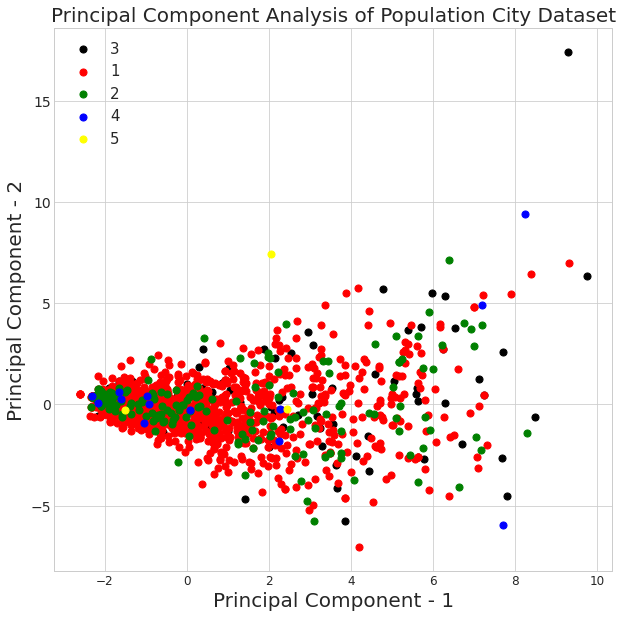

In [91]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Population City Dataset",fontsize=20)
targets = population_venue_data['population_bin'].unique()
colors = ['black','red', 'green', 'blue', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = population_venue_data['population_bin'] == target
    plt.scatter(PC_cities_Df.loc[indicesToKeep, 'principal component 1']
               , PC_cities_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<Figure size 432x288 with 0 Axes>

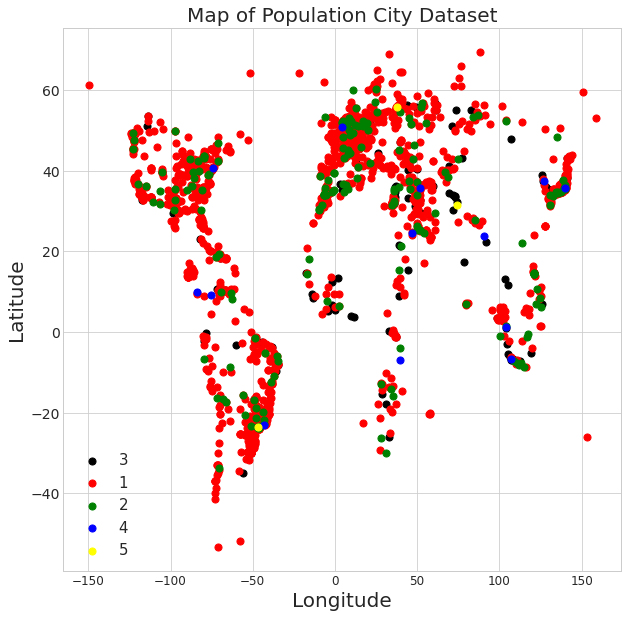

In [93]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.title("Map of Population City Dataset",fontsize=20)
targets = population_venue_data['population_bin'].unique()
colors = ['black','red', 'green', 'blue', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = population_venue_data['population_bin'] == target
    plt.scatter(population_venue_data.loc[indicesToKeep, 'Longitude']
               , population_venue_data.loc[indicesToKeep, 'Latitude'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


In [63]:
# multiple linear regression to find population size
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_mlr = np.asanyarray(X_train)
y_mlr = np.asanyarray(y_train)
regr.fit (x_mlr, y_mlr)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [-7.45181785e+04 -2.64435768e+04  2.40991916e+05  1.97868781e+06
  1.47530247e+04  8.00571885e+03  1.60601239e+06 -1.69943514e+05
 -1.37846282e+03  3.58309467e+05 -9.73353995e+04  1.20017554e+05
  2.86794081e+04  4.21475098e+04 -5.80584081e+04  4.03293705e+03
 -5.26566049e+04  6.01792724e+04 -7.08864900e+02  1.37440974e+06
  4.53781609e+05 -1.79391871e+04 -8.26400084e+01 -1.38935768e+05
 -1.35609457e+05  4.04954927e+03  7.69870824e+05  1.04481436e+05
 -8.83136171e+02  1.65482633e+05  5.25035672e+04  1.57047130e+05
 -3.73243106e+04  8.08712511e+04]


In [64]:
y_hat_mlr= regr.predict(X_test)
x_mlr_test = np.asanyarray(X_test)
y_mlr_test = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat_mlr - y_mlr_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_mlr_test, y_mlr_test))

Residual sum of squares: 376807678654.74
Variance score: 0.16


[[1.         0.42466454]
 [0.42466454 1.        ]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


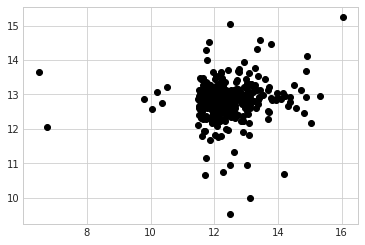

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(np.log(y_mlr_test), np.log(y_hat_mlr), 'o', color='black'); #maybe color by population bin, or something
print(np.corrcoef(y_mlr_test,y_hat_mlr))

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.title("Map of Population City Dataset",fontsize=20)
targets = population_venue_data['population_bin'].unique()
colors = ['black','red', 'green', 'blue', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = X_test['population_bin'] == target
    plt.scatter(population_venue_data.loc[indicesToKeep, 'Longitude']
               , population_venue_data.loc[indicesToKeep, 'Latitude'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})



In [94]:
X_test.head()

,Bank,Bar,Center,College,Culture,Entertainment,Factory,Farm,Food,Government,Health,Historic Site,Hotel,House,Market,Museum,Neighborhood,Office,Outdoors,Palace,Pet,Place,Plaza,Post Office,Religion,Restaurant,Salon,Service,Shop,Spa,Sports,Studio,Transportation,other
1710,0,10,0,0,3,1,0,0,0,0,0,0,1,2,1,2,0,0,1,0,0,4,1,0,0,17,0,0,22,0,0,0,2,0
611,0,6,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,7,1,0,0,16,0,0,3,0,1,0,0,0
162,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0
1243,0,2,0,0,0,0,0,0,0,0,1,0,2,1,1,0,0,0,0,0,0,1,0,0,0,7,0,0,7,0,0,0,2,0
126,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


Conclusion: Variance score is extremely low. The prediction does not work well as visiualized in Figure and indicated by the correlation coefficient. Maybe feature selection will help. Like only using one or two features. Automation to find best model

In [ ]:



# maybe a pca or tsne?

# try the different models predicting the population bin

# evaluate

In [ ]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 